In [24]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Computational Mathematics <a class="tocSkip">

##  Interpolation, regression (or curve-fitting) and quadrature <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Finding-two-model-parameters-given-two-pieces-of-data" data-toc-modified-id="Homework---Finding-two-model-parameters-given-two-pieces-of-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Finding two model parameters given two pieces of data</a></span><ul class="toc-item"><li><span><a href="#Solution---Fitting-two-data-points" data-toc-modified-id="Solution---Fitting-two-data-points-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Fitting two data points</a></span></li></ul></li><li><span><a href="#Homework---Lagrange-polynomial" data-toc-modified-id="Homework---Lagrange-polynomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Lagrange polynomial</a></span><ul class="toc-item"><li><span><a href="#Solution---Lagrange-polynomial" data-toc-modified-id="Solution---Lagrange-polynomial-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Lagrange polynomial</a></span></li></ul></li><li><span><a href="#Homework---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint" data-toc-modified-id="Homework---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Implementing a trapezoidal rule function and compare with midpoint</a></span><ul class="toc-item"><li><span><a href="#Solution---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint" data-toc-modified-id="Solution---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Implementing a trapezoidal rule function and compare with midpoint</a></span></li></ul></li><li><span><a href="#Homework---Implement-the-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="Homework---Implement-the-composite-version-of-the-trapezoidal-rule-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Implement the composite version of the trapezoidal rule</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-the-composite-version-of-the-trapezoidal-rule" data-toc-modified-id="Solution---Implement-the-composite-version-of-the-trapezoidal-rule-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Implement the composite version of the trapezoidal rule</a></span></li></ul></li><li><span><a href="#Homework---Newton-Cotes-quadrature-rules-[$\star\star$]" data-toc-modified-id="Homework---Newton-Cotes-quadrature-rules-[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Newton-Cotes quadrature rules [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Warning" data-toc-modified-id="Warning-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Hint" data-toc-modified-id="Hint-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Hint</a></span></li><li><span><a href="#Solution---Newton-Cotes-quadrature-rules" data-toc-modified-id="Solution---Newton-Cotes-quadrature-rules-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Solution - Newton-Cotes quadrature rules</a></span></li></ul></li></ul></li></ul></div>

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as this lecture is about interpolation we will make use of this SciPy library
import scipy.interpolate as si
import scipy.integrate

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Finding two model parameters given two pieces of data

We stated in class that:


The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the linear function given by

$$ y = f(x) \equiv a_0 + a_1\,x \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution of our data into the functional form we arrive at two simultaneous equations for two unknown parameters (or a $2\times 2$ matrix system)

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

Show through the substitution of one equation into the other that this has the solution

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Form the set of two simultaneous equations and solve by hand to derive this solution for the coefficients.


### Solution - Fitting two data points

We have two pieces of information - let's write these out:

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

We are assuming we know the $x$'s and the $y$'s, and we want to find the $a$'s.

There are multiple ways we could solve this, one way is to rearrange the second equation to give an expression for $a_1$ in terms of $a_0$:

$$ a_0 = y_1 - a_1x_1,$$

and substitute this into the first equation:

$$ y_0 = a_0 + a_1\,x_0 = y_1 - a_1x_1 + a_1\,x_0 = y_1 - (x_1-x_0)a_1,$$

which we can solve for $a_1$:

$$ a_1 = \frac{y_1 - y_0}{x_1 - x_0}.$$

We can now substitute this into either one of the two original equations to find $a_0$ - consider (1) for example:

$$y_0 = a_0 + a_1\,x_0 = a_0 + \frac{y_1 - y_0}{x_1 - x_0} x_0.$$

Rearranging we get the solution we want:

$$a_0 = y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0.$$

Note that this is equivalent to forming and solving the linear system

$$
\begin{pmatrix}
1 & x_0  \\
1 & x_1 
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}.
$$

We therefore have

$$ y = f(x) = P_1(x) \equiv a_0 + a_1\,x$$

where 

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Collecting terms we have

\begin{align}
y = a_0 + a_1\,x 
& = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0 + \frac{y_1-y_0}{x_1-x_0} x\\
& = y_0 - \frac{y_1\, x_0}{x_1-x_0} + \frac{y_0\, x_0}{x_1-x_0} + \frac{y_1\, x}{x_1-x_0}  - \frac{y_0\, x}{x_1-x_0} \\
& = \frac{1}{x_1-x_0}
\left[ 
y_0(x_1-x_0) - y_1\, x_0 + y_0\, x_0 + y_1\, x- y_0\, x
\right] \\
& = \frac{1}{x_1-x_0}
\left[ 
y_0 (x_1 - x)  + y_1 (x -  x_0)
\right] \\
& = \frac{x - x_1}{x_0-x_1}\,y_0 + \frac{x - x_0}{x_1-x_0}\,y_1
\end{align}


and this does indeed agree with the expression we can just write down based on our knowledge of the Lagrange polynomial!

## Homework - Lagrange polynomial

Based upon the description of the Lagrange interpolating polynomial from class (including the Lagrange basis polynomials) try implementing functions to construct these and check your code by comparing our results visually against the results we obtained exactly for linear and quadratic problems, as well as the 6 data point example we found the degree 5 interpolating polynomial for using `SciPy` (i.e. the example copied below).

[I say check rather than verify as just confirming you get the right answer for one set of inputs isn't generally enough to argue full verification! Recall getting the right answer for the wrong reasons from an earlier lecture].

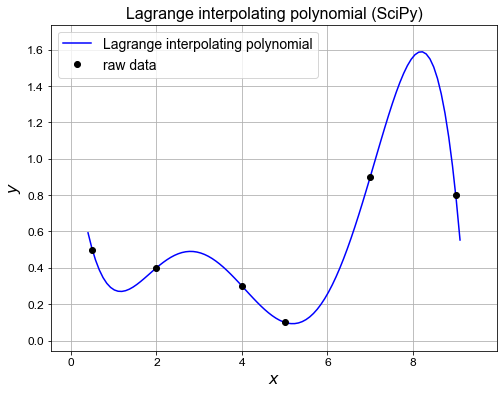

In [26]:
# The SciPy example from class

### Our raw data from earlier
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# recall above that we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

If you want to follow my own solution, then you could start from the following code skeleton where you need to figure out how to complete to incomplete lines indicated by `.......`

*Pseudo-code / code skeleton:*

``` Python
def Lagrange_basis_poly(xi, x):
    """Calculate Lagrange basis polynomials.

    Parameters
    ----------
    xi : array_like
        The x-component of the data
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    l : ndarray
        The Lagrange polynomials evaluated at x, has size (len(xi), len(x))
    """
    # we have N+1 data points, and so the polynomial degree N must be the length of xi minus 1
    N = len(xi) - 1
    # the Lagrange basis polynomials are a product, so let's initialise them with 1
    # (cf. for a summation where we would most likely initialise with zero)
    # we have N+1 of them, and we want their values at locations x, hence size (N+1)xlen(x)
    l = np.ones((N+1, len(x)))
    # we want to iterate over i ranging from zero to N
    for i in range(0, N+1):
        for m in range(0, N+1):
            if (m != i):
                l[i, :] = .........
    return l


def Lagrange_interp_poly(xi, yi, x):
    """Calculates Lagrange interpolation polynomial from N+1 data points.

    Parameters
    ----------
    xi, yi : array_like
        The N+1 data points (i = 0, 1, ..., N)
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    L : ndarray
        Lagrange interpolation polynomial evaluated at x
    """
    # first call our function above to calculate the individual basis functions l
    l = Lagrange_basis_poly(xi, x)
    print('len(xi), len(x), l.shape: ', len(xi), len(x), l.shape)
    # L is our Lagrange polynomial evaluated at the locations x
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = .............
    return L


# Our data points
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Define the x locations we will want to evaluate the Lagrange polynomial at - 
# enough points to get a smooth curve in the plot
x = np.linspace(0.4, 9.1, 100)

# Perform the Lagrange interpolation.
# L here is the evaluation of the Lagrange poly at locations x
L = Lagrange_interp_poly(xi, yi, x)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin
ax1.margins(0.1)

# plot (x, y) = (x, L(x))
ax1.plot(x, L, 'b', label='Lagrange polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
```

### Solution - Lagrange polynomial

len(xi), len(x), l.shape:  6 100 (6, 100)


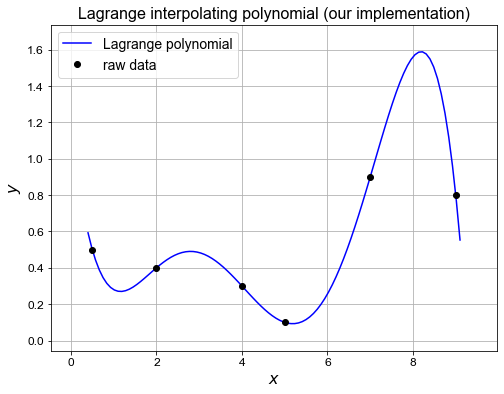

In [27]:
def Lagrange_basis_poly(xi, x):
    """Calculate Lagrange basis polynomials.

    Parameters
    ----------
    xi : array_like
        The x-component of the data
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    l : ndarray
        The Lagrange polynomials evaluated at x, has size (len(xi), len(x))
    """
    # we have N+1 data points, and so the polynomial degree N must be the length of xi minus 1
    N = len(xi) - 1
    # the Lagrange basis polynomials are a product, so let's initialise them with 1
    # (cf. for a summation where we would most likely initialise with zero)
    # we have N+1 of them, and we want their values at locations x, hence size (N+1)xlen(x)
    l = np.ones((N+1, len(x)))
    # we want to iterate over i ranging from zero to N
    for i in range(0, N+1):
        for m in range(0, N+1):
            if (m != i):
                l[i, :] = l[i, :] * (x - xi[m]) / (xi[i] - xi[m])
    return l


def Lagrange_interp_poly(xi, yi, x):
    """Calculates Lagrange interpolation polynomial from N+1 data points.

    Parameters
    ----------
    xi, yi : array_like
        The N+1 data points (i = 0, 1, ..., N)
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    L : ndarray
        Lagrange interpolation polynomial evaluated at x
    """
    # first call our function above to calculate the individual basis functions l
    l = Lagrange_basis_poly(xi, x)
    print('len(xi), len(x), l.shape: ', len(xi), len(x), l.shape)
    # L is our Lagrange polynomial evaluated at the locations x
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = L + yi[i] * l[i]
    return L


# Our data points
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Define the x locations we will want to evaluate the Lagrange polynomial at - 
# enough points to get a smooth curve in the plot
x = np.linspace(0.4, 9.1, 100)

# Perform the Lagrange interpolation.
# L here is the evaluation of the Lagrange poly at locations x
L = Lagrange_interp_poly(xi, yi, x)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin
ax1.margins(0.1)

# plot (x, y) = (x, L(x))
ax1.plot(x, L, 'b', label='Lagrange polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

## Homework - Implementing a trapezoidal rule function and compare with midpoint

Recall from the lecture the trapezoidal rule

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

implement a function to calculate this estimate, and apply it to the `sin` example from the lecture.

Perform an error analysis and compare  the errors to the seemingly simpler midpoint rule.

You can also check for "exact" agreement with the SciPy implementation <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapz.html">`scipy.integrate.trapz`</a>,

or  <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapezoid.html">`scipy.integrate.trapezoid`</a> 
depending on what version you're using.

### Solution - Implementing a trapezoidal rule function and compare with midpoint

In [28]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    ** Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version. **
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

(Note the comment in the code on "redundant function evaluations" - can you see why this is and how to change things to improve efficiency?)

Let's test the function as we did for the midpoint rule.

In addition, let's also output the values computed using `scipy.integrate.trapz` to check they give the same results.

The exact area found by direct integration = 2
Area 1    trapezoid(s) = 0.0000000000000002 (error = 1.999999999999999778e+00)
Area 2    trapezoid(s) = 1.5707963267948968 (error = 4.292036732051032200e-01)
Area 4    trapezoid(s) = 1.8961188979370398 (error = 1.038811020629601956e-01)
Area 8    trapezoid(s) = 1.9742316019455510 (error = 2.576839805444897102e-02)
Area 16   trapezoid(s) = 1.9935703437723391 (error = 6.429656227660895951e-03)
Area 32   trapezoid(s) = 1.9983933609701445 (error = 1.606639029855472245e-03)
Area 100  trapezoid(s) = 1.9998355038874440 (error = 1.644961125559785131e-04)
Area 1000 trapezoid(s) = 1.9999983550656619 (error = 1.644934338074222069e-06)

Verificaton check: 
These are the corresponding values computed using Scipy's trapezoidal function and the difference with our computed result
0.0000000000000002, 0.0000000000000000e+00
1.5707963267948968, 0.0000000000000000e+00
1.8961188979370398, 0.0000000000000000e+00
1.9742316019455508, 2.2204460492503131e-16
1.993

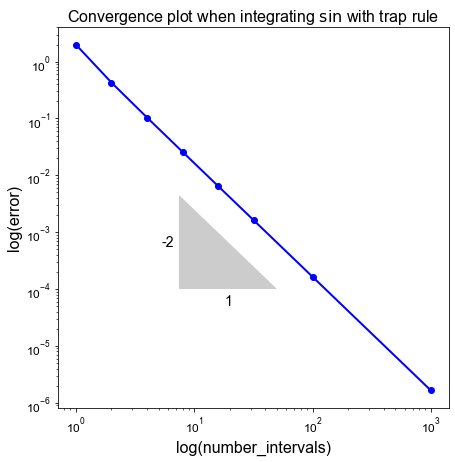

In [29]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Now let's test the trapezoidal function.
print("The exact area found by direct integration = 2")
interval_sizes_T = [1, 2, 4, 8, 16, 32, 100, 1000]
areas_T = np.zeros_like(interval_sizes_T, dtype='float64')
errors_T = np.zeros_like(interval_sizes_T, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_T):
    areas_T[i] = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i] = abs(areas_T[i]-2)
    print('Area {:<4d} trapezoid(s) = {:.16f} (error = {:.18e})'.format(
        number_intervals, areas_T[i], errors_T[i]))

# compare the outputs from our code against those obtained with the Scipy function
print("\nVerificaton check: \nThese are the corresponding values computed using Scipy's"
      " trapezoidal function and the difference with our computed result")
for (i, number_intervals) in enumerate(interval_sizes_T):
    area_scipy_trap = scipy.integrate.trapz(f(np.linspace(0, np.pi, number_intervals+1)), 
                               np.linspace(0, np.pi, number_intervals+1))
    # see a comment below to explain the use of linspace here
    print('{0:.16f}, {1:.16e}'.format(area_scipy_trap, abs(area_scipy_trap - areas_T[i])))

    
# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with trap rule', fontsize=16)
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

#### Observations / comments


- Our function agrees with SciPy down to machine precision. This, along with the convergence of our result to the true solution, offers good evidence that we've implemented the algorithm correctly (i.e. code verification). However, note that there is always the possibility that it only works correctly for this one function so if we wanted to be really rigorous we should test on several functions, e.g. another funtion that is not trigonometric in nature.


- As for the midpoint rule, this method is also seen to be second-order accurate (again, for this function).


- For this function the errors with the trapezoidal rule are actually slightly larger than we found for the midpoint rule, which is *not* what we were expecting.


- Note that the `scipy.integrate.trapz` function takes data points, rather than the function and number of subintervals. Hence when calling `scipy.integrate.trapz` we give it the $(y(x),x)$ data given by `f(np.linspace(0, np.pi, number_intervals+1))` and  `np.linspace(0, np.pi, number_intervals+1))`.  To match the $\text{number_intervals}$ intervals used in our code, in order to test for exact agreement, we need to give `scipy.integrate.trapz` ($\text{number_intervals} + 1$) pieces of data. We can use `numpy.linspace` here since at present our codes assume uniformly sizes subintervals!

Let's compare against the midpoint rule

In [30]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


The exact area found by direct integration = 2
Area 1    rectangle(s) = 3.141592654 (error = 1.141592654e+00)
Area 2    rectangle(s) = 2.221441469 (error = 2.214414691e-01)
Area 4    rectangle(s) = 2.052344306 (error = 5.234430595e-02)
Area 8    rectangle(s) = 2.012909086 (error = 1.290908560e-02)
Area 16   rectangle(s) = 2.003216378 (error = 3.216378168e-03)
Area 32   rectangle(s) = 2.000803416 (error = 8.034163099e-04)
Area 100  rectangle(s) = 2.000082249 (error = 8.224907099e-05)
Area 1000 rectangle(s) = 2.000000822 (error = 8.224672938e-07)


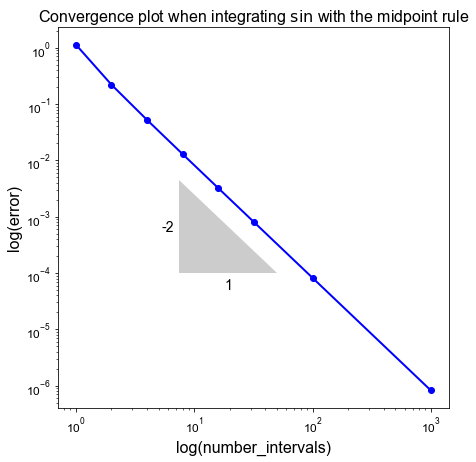

In [31]:
def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Now let's test the midpoint function.
print('The exact area found by direct integration = 2')

# create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)
    print('Area {:<4d} rectangle(s) = {:.9f} (error = {:.9e})'.format(
        number_intervals, area, errors_M[i]))

# plot how the errors vary with interval size
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with the midpoint rule', fontsize=16)

# add a triangle to indicate the line slope
annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

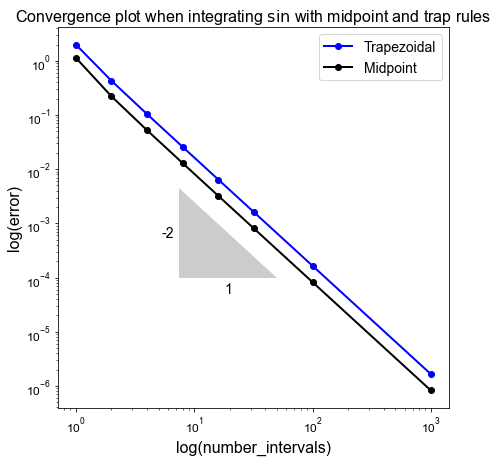

In [32]:
# plot
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(111)
ax1.set_xlabel('log(number_intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot when integrating $\sin$ with midpoint and trap rules', fontsize=16)
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.legend(loc='best', fontsize=14)

annotation.slope_marker((5e1, 1e-4), (-2, 1), invert=True, ax=ax1, 
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14));

We find that the errors with the Trapezoidal rule (for this example) are indeed twice those of the midpoint rule.

## Homework - Implement the composite version of the trapezoidal rule

In the lecture we implemented the naive version of the trapezoidal rule over multiple subintervals - we noted that this implementation has redundant function evaluations.

Implement a composite version based upon the discussion in the lecture which minimises function evaluations and test it against the function `trapezoidal_rule`.

Think about how you can make the *verification* of your new code against the one from the Lecture as rigorous as possible.

### Solution - Implement the composite version of the trapezoidal rule

The key difference is to replace the maths

$$I_T :=  \sum_{i=0}^{n-1}\,  I_T^{(i)}  = \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i), $$

with

$$I_T := [f(x_0) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(x_n)]\frac{\Delta x}{2}.$$

For rigorous verification we should at a minimum: (1) check for agreement with a code we trust; (2) check for convergence, and that convergence is consistent with what they theory tells us the convergence rate should be; (3) and we should test on different problems (here function to integrate, as well as different integration limits) and using different numbers of intervals, etc.

In [33]:
# function from the lecture:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule"""
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
             (function(this_bin_start) + function(this_bin_start+interval_size)) / 2.0

    # Return our running total result
    return I_T


# a new function
def trapezoidal_rule2(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule - composite version"""
    interval_size = (b - a)/number_intervals
    assert interval_size > 0
    assert type(number_intervals) == int
    I_T = 0.0
    # Use the composite form of the rule
    # note that with some thought we can minimise the multiplications by 2, as well as by
    # the interval_size:
    I_T += function(a)/2.0
    for i in range(1, number_intervals):
        I_T += function(a + i * interval_size)
    I_T += function(b)/2.0
    # Return our running total result
    return I_T * interval_size

In [34]:
# Now let's test our two Trapezoidal rule functions.

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# here we just print the two intergal approximations and compare using the
# "eyeball" norm - ideally you would use something like np.allclose.
print('\nVerificaton check: \n')
interval_sizes = [1, 2, 4, 8, 16, 32, 100, 1000]
for (i, number_intervals) in enumerate(interval_sizes):
    print('{0:.16f}, {1:.16e}'.format(trapezoidal_rule(0, np.pi, f, number_intervals),\
                                      trapezoidal_rule2(0, np.pi, f, number_intervals)))
    
# of course you could use numpy.allclose, and you should also test on other equations, e.g.:

print('\nTest on x^2 with 10 intervals:',np.allclose(  trapezoidal_rule(0., 1., lambda x : x**2, 10),\
                    trapezoidal_rule2(0., 1., lambda x : x**2, 10)) )

print('\nTest on exp with 100 intervals:',np.allclose(  trapezoidal_rule(1., 3., np.exp, 100),\
                    trapezoidal_rule2(1., 3., np.exp, 100)) )


Verificaton check: 

0.0000000000000002, 1.9236706937217898e-16
1.5707963267948968, 1.5707963267948966e+00
1.8961188979370398, 1.8961188979370398e+00
1.9742316019455510, 1.9742316019455508e+00
1.9935703437723391, 1.9935703437723395e+00
1.9983933609701445, 1.9983933609701441e+00
1.9998355038874440, 1.9998355038874436e+00
1.9999983550656619, 1.9999983550656624e+00

Test on x^2 with 10 intervals: True

Test on exp with 100 intervals: True


<div class="advanced">

## Homework - Newton-Cotes quadrature rules [$\star\star$]

We stated in the lecture that:

"Note that an alternate derivation of the same rule [Simpsons] involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation."

Given that we can do this for different interpolating poynomials leads us to the family of [Newton-Cotes quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas) in the case where we use an interpolating polynomial that matches the function being integrated at *equally spaced* points over an interval.

<br>

Specifically, assume we have $N+1$ equally spaced data points $(x_i,y_i)$ [other families of quadrature rules follow from not having equally spaced points]. We will assume we are dealing with the integration of a known function and so $y_i = f(x_i)$.

**Note we are trying to be careful about the distinction between $n$ and $N$ throughout this lecture!**

We know from the material we saw on interpolation that we can fit an order $N$ polynomial exactly through these points; we call this  polynomial $P_N(x)$.

Recall the Lagrange form of $P_N$ was defined as

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

with the *Lagrange basis polynomials*  defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.

<br>

An approximation to our integral is therefore given by

\begin{align*}
I &\approx \int_a^b\,P_N(x)\,dx,\\[10pt]
&= \sum_{i=0}^{N}\, \left[\,f(x_i) \int_a^b\, \ell_i(x)\, dx\right],\\[10pt]
&=\sum_{i=0}^{N}\, A_i \, f(x_i),
\end{align*}

where

$$ A_i := \int_a^b\, \ell_i(x)\, dx, \;\;\;\; i = 0,1,\ldots,N. $$


Simply by varying $N$ we can come up with quadrature rules of arbitrary order. 

Let's check we can recreate the schemes we have already seen via this approach - consider the case $N=1$ and check you arrive a the Trapezoidal rule, and for $N=2$ that you arrive at Simpson's rule.

</div>

### Warning

- Recall from the previous lecture that fitting high-order polynomials through many (evenly spaced) data points was found to be a bad idea in the context of interpolation (we saw this in an example which used the Runge function). 


- This will of course also compromise the corresponding quadrature rules, and so we should be very careful about the use of high-order Newton-Cotes based quadrature.
    

### Hint

Note that the Trapezoidal rule derivation will require you to perform evaluations of integrals such as

\begin{align*}
A_0 & := \int_a^b\, \ell_0(x)\, dx  \\[5pt]
& = \frac{1}{a-b}\int_a^b\, (x-b)\, dx   \\[5pt]
&= \frac{1}{a-b}\left[\frac{x^2}{2} - b x\right]_a^b \\[5pt]
& = \frac{1}{a-b} \left[\frac{b^2 - a^2}{2} - b (b-a)\right]  \\[5pt]
&= -\frac 12 (a+b) + b = \frac{b-a}2,
\end{align*}


<br>

However, for Simpson's rule you will need to evaluate more complicated integrals of the form

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

<br>

Note that this integral is much easier to do if you introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Your integral then becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi = \ldots = \frac{h}{3}.
\end{align*}

Fill in the gaps and do the other integrals to complete the derivation.

### Solution - Newton-Cotes quadrature rules

#### (N=1) Trapezoidal

If $N=1$ (i.e. two data points) then the Lagrange basis functions are 

$$\ell_0(x) = \frac{x-x_1}{x_0-x_1}= \frac{x-b}{a-b}, \;\;\;\;\;\;\;\;
\ell_1(x) = \frac{x-x_0}{x_1-x_0} = \frac{x-a}{b-a},$$

with integrals

\begin{align*}
A_0 & := \int_a^b\, \ell_0(x)\, dx =  \frac{1}{a-b}\int_a^b\, (x-b)\, dx  \\[5pt]
&= \frac{1}{a-b}\left[\frac{x^2}{2} - b x\right]_a^b = \frac{1}{a-b} \left[\frac{b^2 - a^2}{2} - b (b-a)\right] \\[5pt]
&= -\frac 12 (a+b) + b = \frac{b-a}2,
\end{align*}

and

\begin{align*}
A_1 & := \int_a^b\, \ell_1(x)\, dx =  \frac{1}{b-a}\int_a^b\, (x-a)\, dx  \\[5pt]
&= \frac{1}{b-a}\left[\frac{x^2}{2} - a x\right]_a^b = \frac{1}{b-a} \left[\frac{b^2 - a^2}{2} -a (b-a)\right] \\[5pt]
&= \frac 12 (b+a) - a = \frac{b-a}2,
\end{align*}

and so our quadrature rule over a single interval can be written as

\begin{align*}
I \approx \sum_{i=0}^{1}\, A_i \, f(x_i) = 
A_0 f(a) + A_1 f(b) = (b - a)\frac{(f(a) + f(b))}{2},
\end{align*}

which we indeed recognise as the Trapezoidal scheme.



#### (N=2) Simpson's rule

Now consider the case $N=2$ where we have data at two end points of an interval $[a,b]$ as well as the midpoint $c := \left ( a+b\right )/2$. 

To simplify the terminology below call these three points $x_0$, $x_1$ and $x_2$, with $x_1$ the midpoint $c$.

The three Lagrange basis functions in this case are

\begin{align*}
\ell_0(x) &= \frac{(x-x_1)(x - x_2)}{(x_0-x_1)(x_0-x_2)}, \\[5pt]
\ell_1(x) &= \frac{(x-x_0)(x - x_2)}{(x_1-x_0)(x_1-x_2)}, \\[5pt]
\ell_2(x) &= \frac{(x-x_0)(x - x_1)}{(x_2-x_0)(x_2-x_1)}. 
\end{align*}

The integral of the first of these is

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

This integral is much easier to do if we introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Our integral now becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi 
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{\xi^3}{3} - h \frac{\xi^2}{2}\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} - h \frac{h^2}{2} - \frac{(-h)^3}{3} + h \frac{(-h)^2}{2}   \right] \\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} - \frac{h^3}{2} + \frac{h^3}{3} +  \frac{h^3}{2}   \right] 
\\[5pt]
& = \frac{1}{2h^2}2\frac{h^3}{3} \\[5pt]
& = \frac{h}{3}.
\end{align*}

Similarly,

\begin{align*}
A_1 &= \int_{x_0}^{x_2}\, \ell_1(x)\, dx \\[5pt]
& = \int_{x_0}^{x_2}\, \frac{(x-x_0)(x - x_2)}{(x_1 - x_0)(x_1-x_2)}  \, d\xi \\[5pt]
& = \frac{1}{(x_1-x_0)(x_1-x_2)}\int_{x_0}^{x_2}\, (\xi + h)(\xi - h) \, d\xi\\[5pt]
& = \frac{1}{(h)(-h)}\int_{-h}^{h}\, \xi^2 - h^2 \, d\xi 
\\[5pt]
& = \frac{1}{-h^2}\left[\frac{\xi^3}{3} - h^2 \xi\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{-h^2}\left[\frac{h^3}{3} - h^2 h - \frac{(-h)^3}{3} + h^2(-h) \right] \\[5pt]
& = \frac{1}{-h^2}\left[\frac{h^3}{3} - h^3 + \frac{h^3}{3} - h^3 \right] \\[5pt]
& = \frac{1}{-h^2}\frac{-4h^3}{3} \\[5pt]
& = \frac{4h}{3}.
\end{align*}

And finally

\begin{align*}
A_2 &= \int_{x_0}^{x_2}\, \ell_2(x)\, dx \\[5pt]
& = \int_{x_0}^{x_2}\, \frac{(x-x_0)(x - x_1)}{(x_2-x_0)(x_2-x_1)}  \, dx \\[5pt]
& = \frac{1}{(x_2-x_0)(x_2-x_1)}\int_{x_0}^{x_2}\, (\xi + h)\xi \,d\xi \\[5pt]
& = \frac{1}{(2h)(h)}\int_{-h}^{h}\, \xi^2 + h\xi \, d\xi
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{\xi^3}{3} + h \frac{\xi^2}{2}\right]_{-h}^{h}
\\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} + h \frac{h^2}{2} - \frac{(-h)^3}{3} -  h \frac{(-h)^2}{2} \right] \\[5pt]
& = \frac{1}{2h^2}\left[\frac{h^3}{3} +  \frac{h^3}{2} + \frac{h^3}{3} - \frac{h^3}{2} \right] \\[5pt]
& = \frac{1}{2h^2}\frac{2h^3}{3} \\[5pt]
& = \frac{h}{3}.
\end{align*}

Therefore,
\begin{align*}
I \approx \sum_{i=0}^{2}\, A_i \, f(x_i) 
&= A_0 f(a) + A_1 f\left( \frac{a+b}{2} \right) + A_2 f(b) \\[5pt]
&=  \frac{h}{3} \left( f(a) + 4 f\left( \frac{a+b}{2} \right) + f(b)  \right)\\[5pt]
&=  \frac{(b-a)}{6} \left( f(a) + 4 f\left( \frac{a+b}{2} \right) + f(b)  \right)
\end{align*}

which is Simpson's rule we derived in another way in the lecture.